In [50]:
%reset
import numpy as np
import pandas as pd

y = np.array([1221,1207,1187, 1555,1562, 1575,1827,1839, 1802,1609, 1627, 1642,1451, 1472, 1465, 1321,1289, 1292])
x = np.repeat(np.arange(0,6,1),    repeats    =    3)
df = pd.DataFrame({'x':x, 'y':y})
#df

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [51]:
# create a squared x for the quadratic predictor variable and add it to the df

x_sqr=np.square(x)
df['x_sqr']=x_sqr
#df

In [52]:
#Fit the OLS regression line model for the polynomial fit

from statsmodels.formula.api import ols

# Creating the linear model, produce the fit, and print out the summmary of the regression model
model=ols('y~x+x_sqr',data=df)
results=model.fit()
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.849   
Dependent Variable: y                AIC:                212.5036
Date:               2024-02-08 14:59 BIC:                215.1747
No. Observations:   18               Log-Likelihood:     -103.25 
Df Model:           2                F-statistic:        48.78   
Df Residuals:       15               Prob (F-statistic): 2.73e-07
R-squared:          0.867            Scale:              6747.1  
-----------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------
Intercept   1242.8929  42.9816 28.9169 0.0000 1151.2798 1334.5059
x            382.6655  40.4297  9.4650 0.0000  296.4916  468.8394
x_sqr        -76.6607   7.7616 -9.8770 0.0000  -93.2041  -60.1173
-----------------------------------------------------------------
Omnibus:              2.696

C:\Users\carol\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [53]:
# show the coefficients of the model

results.params

Intercept    1242.892857
x             382.665476
x_sqr         -76.660714
dtype: float64

In [54]:
print("The regression equation is")
print("y =",f'{results.params["Intercept"]:.4}' ,"+",f'{results.params["x"]:.4}',"x","+",f'{results.params["x_sqr"]:.4}',"x_sqr")

The regression equation is
y = 1.243e+03 + 382.7 x + -76.66 x_sqr


In [55]:
# prodcue the ANOVA table

from statsmodels.stats.anova import anova_lm

anova_results = anova_lm(results)
print(anova_results)

            df         sum_sq        mean_sq          F        PR(>F)
x          1.0      21.376190      21.376190   0.003168  9.558562e-01
x_sqr      1.0  658208.892857  658208.892857  97.554600  5.879309e-08
Residual  15.0  101206.230952    6747.082063        NaN           NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


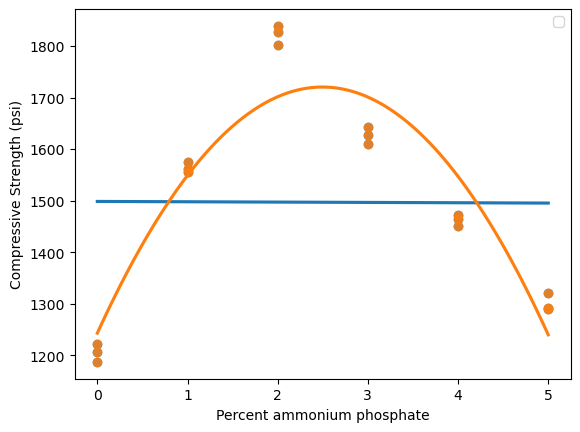

In [64]:
# importing the required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the Least Squares Polynomial regression plot

fig, ax = plt.subplots()

sns.regplot(x ='x', y ='y', data = df,order=1,ci=None,ax=ax)
sns.regplot(x ='x', y ='y', data = df,order=2,ci=None,ax=ax)
plt.xlabel("Percent ammonium phosphate")
plt.ylabel("Compressive Strength (psi)")

In [69]:
# create a cubed x for the cubed predictor variable and add it to the df

x_cube=np.power(x,3)
df['x_cubed']=x_cube
#df

In [73]:
#Fit the OLS regression line model for the cubic fit

# Creating the linear model, produce the fit, and print out the summmary of the regression model
model1=ols('y~x+x_sqr+x_cube',data=df)
results1=model1.fit()
print(results1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.942   
Dependent Variable: y                AIC:                196.0175
Date:               2024-02-08 15:34 BIC:                199.5790
No. Observations:   18               Log-Likelihood:     -94.009 
Df Model:           3                F-statistic:        93.13   
Df Residuals:       14               Prob (F-statistic): 1.73e-09
R-squared:          0.952            Scale:              2588.5  
-----------------------------------------------------------------
              Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-----------------------------------------------------------------
Intercept   1188.0503  28.7856 41.2724 0.0000 1126.3113 1249.7892
x            633.1133  55.9134 11.3231 0.0000  513.1910  753.0356
x_sqr       -213.7672  27.7869 -7.6931 0.0000 -273.3642 -154.1701
x_cube        18.2809   3.6491  5.0098 0.0002   10.4544   26.1073
---------------------------

C:\Users\carol\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [77]:
print("The regression equation is")
print("y =",f'{results1.params["Intercept"]:.4}' ,"+",f'{results1.params["x"]:.4}',"x","+",f'{results1.params["x_sqr"]:.4}',"x_sqr","+",f'{results1.params["x"]:.4}',"x","+",f'{results1.params["x_cube"]:.4}',"cube")

The regression equation is
y = 1.188e+03 + 633.1 x + -213.8 x_sqr + 633.1 x + 18.28 cube


In [78]:
# prodcue the ANOVA table

from statsmodels.stats.anova import anova_lm

anova_results1 = anova_lm(results1)
print(anova_results1)

            df         sum_sq        mean_sq           F        PR(>F)
x          1.0      21.376190      21.376190    0.008258  9.288806e-01
x_sqr      1.0  658208.892857  658208.892857  254.277093  2.259920e-10
x_cube     1.0   64966.535185   64966.535185   25.097658  1.910288e-04
Residual  14.0   36239.695767    2588.549698         NaN           NaN


Text(0, 0.5, 'Compressive Strength (psi)')

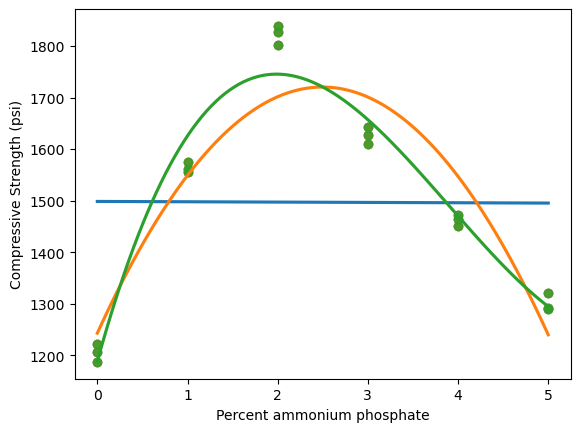

In [79]:
# Plot the Cubic regression plot

fig, ax = plt.subplots()

sns.regplot(x ='x', y ='y', data = df,order=1,ci=None,ax=ax)
sns.regplot(x ='x', y ='y', data = df,order=2,ci=None,ax=ax)
sns.regplot(x ='x', y ='y', data = df,order=3,ci=None,ax=ax)
plt.xlabel("Percent ammonium phosphate")
plt.ylabel("Compressive Strength (psi)")